# Video Game Sales

### Подключение библиотек

In [9]:
import numpy as np
import pandas as pd
%pip install seaborn
import seaborn as sns

#### Импортируем библиотеку matplotlib ####


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

### Загрузка данных

In [12]:
vgs = pd.read_csv("vgsales.csv")

In [13]:
vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### Описание данных

Этот набор данных содержит список видеоигр, продажи которых превысили 100 000 копий.

Name - Название игры

Platform - Платформа выпуска игр (например, PC, PS4 и т.д.)

Year - Год выпуска игры

Genre - Жанр игры

Publisher - Издатель игры

NA_Sales - Продажи в Северной Америке (в миллионах)

EU_Sales - Продажи в Европе (в миллионах)

JP_Sales - Продажи в Японии (в миллионах)

Other_Sales - Продажи в остальном мире (в миллионах)

Global_Sales - Общий объем продаж по всему миру.


##### Выведите размерность и краткую информацию о наборе данных

In [14]:
vgs.shape

(16598, 11)

In [15]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


##### Выведите краткую статистическую информацию по набору данных

In [16]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
vgs.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


##### Проверьте набор данных на наличие пропущенных и дублирующих значений

In [18]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
print(vgs.duplicated().sum())

0


#### Напишите краткий вывод о наборе данных

В наборе данных есть пропуски: 271 в столбце Year и 58 в Publisher, остальные столбцы заполнены полностью.

### Заполнение пустых записей

Удалите пропущенные значения по признаку Publisher, а по признаку Year - замените на среднее значение. Значения по полю Year преобразуйте в целый тип. Удалите признак Rank. После преобразований, убедитесь, что изменения сохранились в наборе данных.

In [20]:
vgs = vgs.copy()

In [21]:
vgs = vgs.dropna(subset=['Publisher'])

In [22]:
mean_year = vgs['Year'].mean()
vgs['Year'] = vgs['Year'].fillna(mean_year).round().astype(int)

In [23]:
vgs = vgs.drop(columns='Rank')

In [24]:
vgs.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
vgs.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [26]:
vgs.shape

(16540, 10)

In [27]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16540 non-null  object 
 1   Platform      16540 non-null  object 
 2   Year          16540 non-null  int32  
 3   Genre         16540 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16540 non-null  float64
 6   EU_Sales      16540 non-null  float64
 7   JP_Sales      16540 non-null  float64
 8   Other_Sales   16540 non-null  float64
 9   Global_Sales  16540 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.1+ MB


### Анализ продаж видеоигр

#### 1. В каком году было выпущено больше всего игр? Выведите первые 10 записей.

In [28]:
year_counts = vgs['Year'].value_counts().sort_values(ascending=False)
year_counts.head(10)

Year
2009    1431
2008    1428
2006    1257
2010    1257
2007    1201
2011    1136
2005     936
2002     829
2003     775
2004     744
Name: count, dtype: int64

In [29]:
most_games_year = year_counts.index[0]
print(most_games_year)

2009


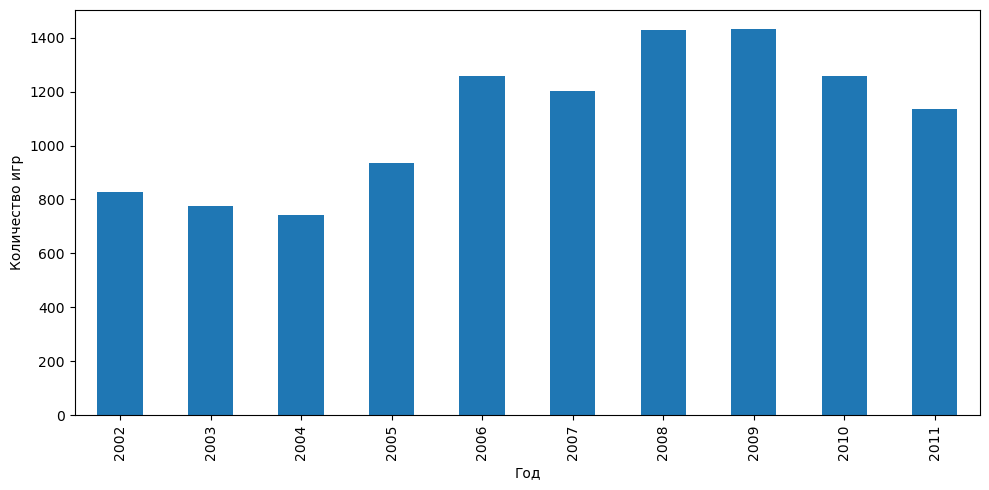

In [40]:
plt.figure(figsize=(10, 5))
vgs['Year'].value_counts().head(10).sort_index().plot(kind='bar')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.tight_layout()
plt.show()

In [41]:
print(f"Количество уникальных значений в Platform: {vgs['Platform'].nunique()}")
print(f"Количество уникальных значений в Genre: {vgs['Genre'].nunique()}")
print(f"Количество уникальных значений в Publisher: {vgs['Publisher'].nunique()}")

Количество уникальных значений в Platform: 31
Количество уникальных значений в Genre: 12
Количество уникальных значений в Publisher: 578


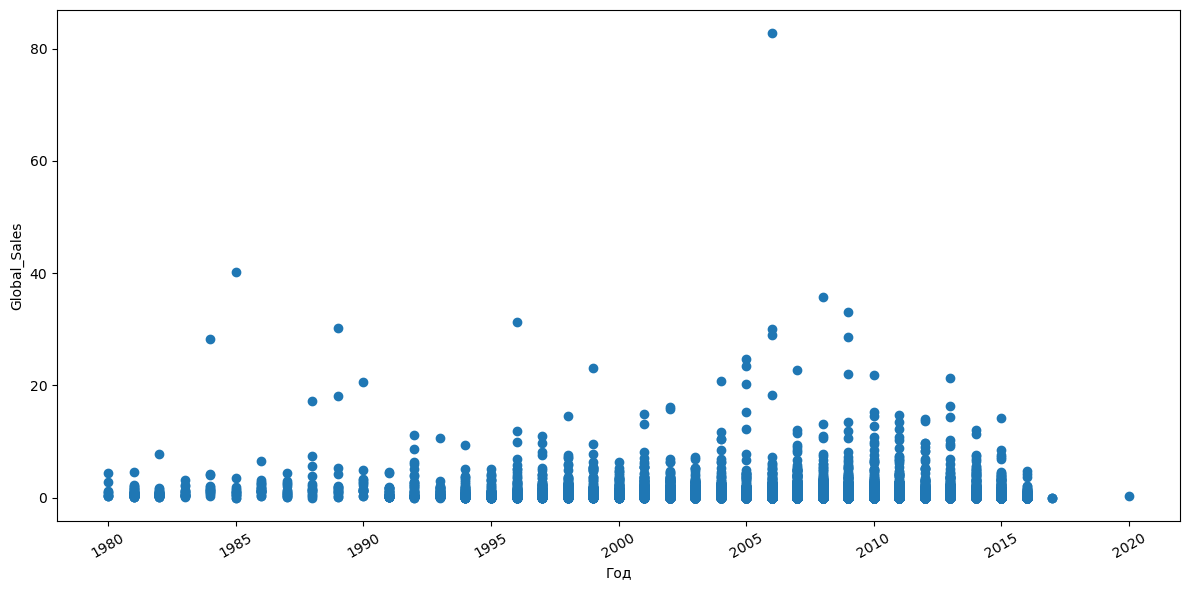

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(vgs['Year'], vgs['Global_Sales'])

plt.xlabel('Год')
plt.ylabel('Global_Sales')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


#### 2. Получите среднюю стоимость продаж в Европе 

In [49]:
mean_eu_sales = vgs['EU_Sales'].mean()
print(mean_eu_sales)

0.1468833131801693


#### 3. Получите максимальную стоимость продаж в Японии и вывведите полную информацию об игре с максимальной суммой продаж

In [51]:
print(vgs['JP_Sales'].max())

10.22


In [55]:
vgs.loc[vgs['JP_Sales'].idxmax()].to_frame().T

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


##### Выведите первые 10 записей с максимальными суммами продажам в Японии по годам

In [101]:
top10_jp_by_year = vgs.groupby('Year')['JP_Sales'].sum().sort_values(ascending=False).head(10).reset_index()
top10_jp_by_year

,Year,JP_Sales
0,2006,79.55
1,2009,61.89
2,2007,60.29
3,2008,60.26
4,2010,59.49
5,1996,57.44
6,2005,54.28
7,2011,53.04
8,1999,52.34
9,2012,51.74


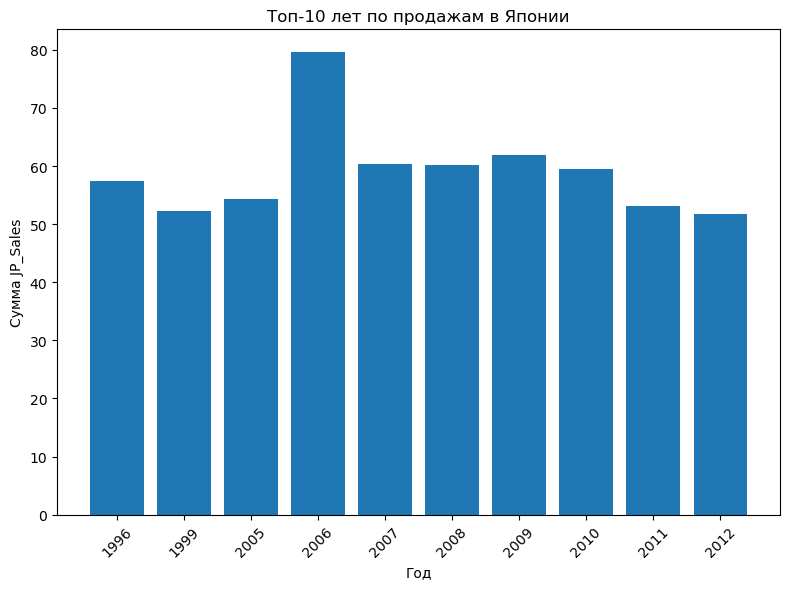

In [73]:
top_10_years = vgs.groupby('Year')['JP_Sales'].sum().nlargest(10).sort_index()

plt.figure(figsize=(8, 6))
plt.bar(top_10_years.index.astype(str), top_10_years.values)
plt.title('Топ-10 лет по продажам в Японии')
plt.xlabel('Год')
plt.ylabel('Сумма JP_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. К какому жанру относится видеоигра "Brain Age 2: More Training in Minutes a Day" video game?

In [74]:
result = vgs[vgs['Name'] == 'Brain Age 2: More Training in Minutes a Day']['Genre']
result

27    Puzzle
Name: Genre, dtype: object

#### 5.  Каков объём продаж видеоигры «Grand Theft Auto: Vice City» по всему миру?

In [75]:
result = vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']['Global_Sales']
result

24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

In [76]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
13732,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04


#### 6. Выведите название видеоигры, которая имеет самые высокие продажи в Северной Америке.

In [77]:
result = vgs[vgs['NA_Sales'] == vgs['NA_Sales'].max()]['Name']
print(result)

0    Wii Sports
Name: Name, dtype: object


#### 7. Выведите видеоигры с самыми низкими продажами в мире

In [78]:
min_sales = vgs['Global_Sales'].min()
result = vgs[vgs['Global_Sales'] == min_sales][['Name', 'Global_Sales']]
result

,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


#### 8. Игр какого жанра было создано больше всего?

In [79]:
vgs['Genre'].nunique()

12

In [80]:
vgs['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [81]:
vgs['Genre'].value_counts()

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

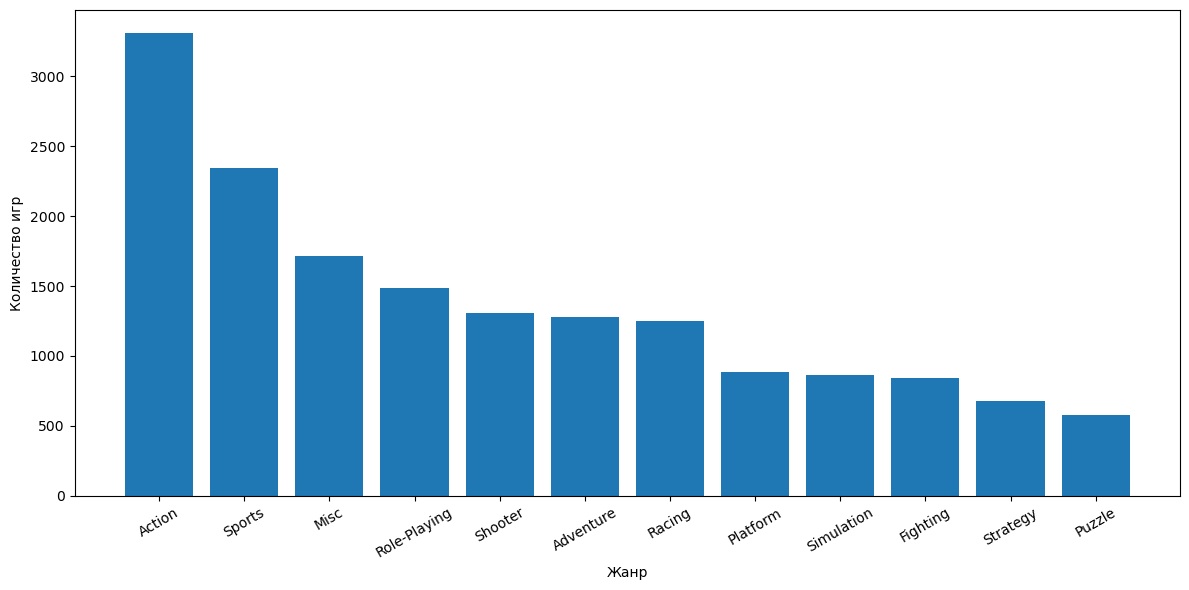

In [82]:
genre_counts = vgs['Genre'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(genre_counts.index, genre_counts.values)

plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### 9. Лучшие игры за 5 лет выпуска по жанрам

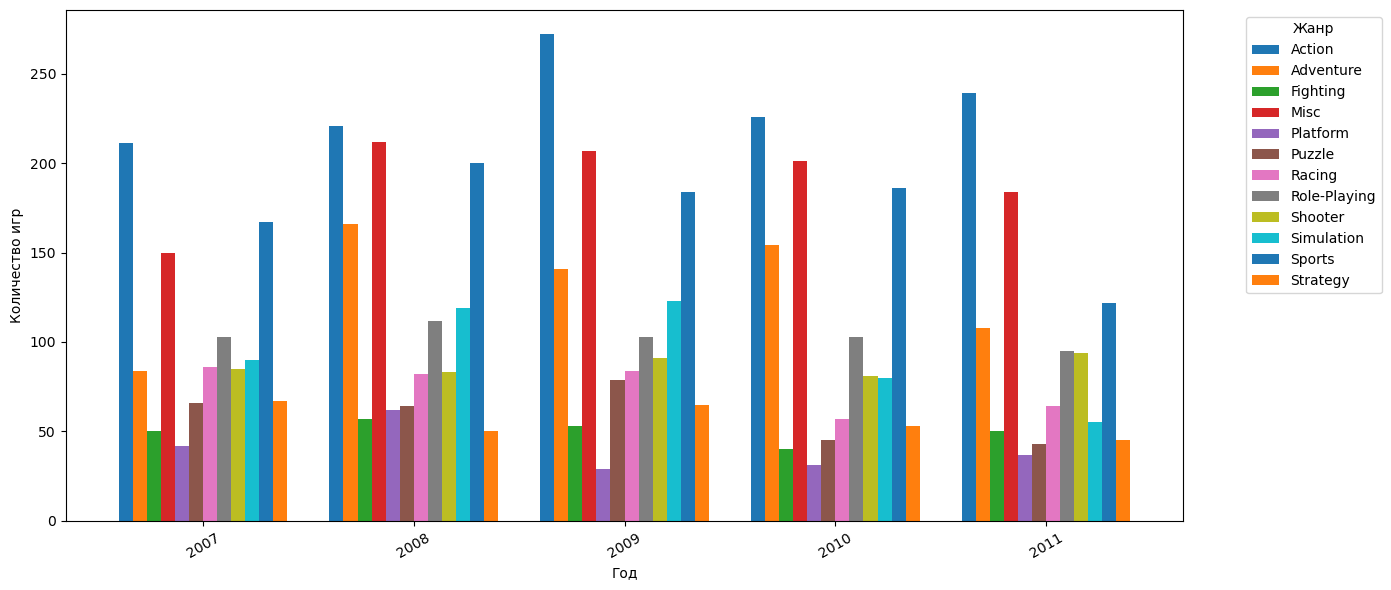

In [83]:
genre_by_year = vgs.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
years_to_show = [2007, 2008, 2009, 2010, 2011]
genre_by_year = genre_by_year.loc[years_to_show]

fig, ax = plt.subplots(figsize=(14, 6))
genre_by_year.plot(kind='bar', ax=ax, width=0.8)

ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')
ax.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### 10.  В каком году были самые высокие продажи по всему миру?¶

In [96]:
data_year = vgs.groupby('Year')['Global_Sales'].sum()

In [97]:
data_year.head(10)

Year
1980    11.38
1981    35.77
1982    28.86
1983    16.79
1984    50.36
1985    53.94
1986    37.07
1987    21.74
1988    47.22
1989    73.45
Name: Global_Sales, dtype: float64

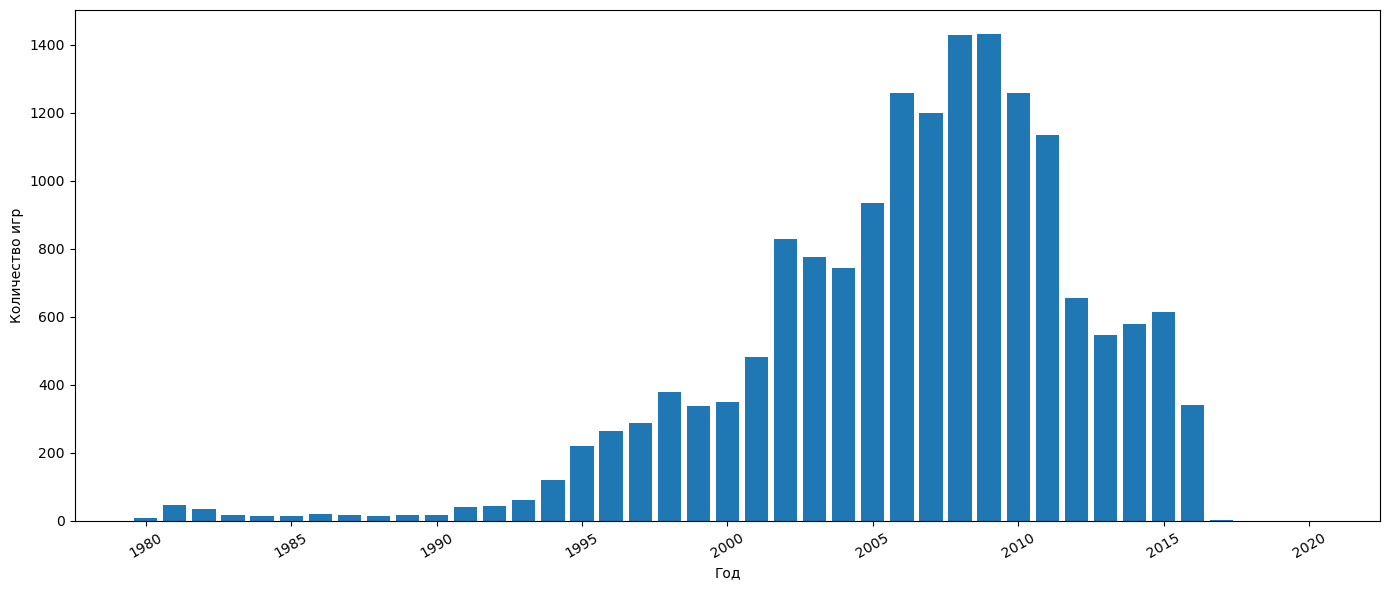

In [98]:
year_counts = vgs['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### 11. Игры какого жанра имеют самую высокую цену продажи в мире

In [99]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

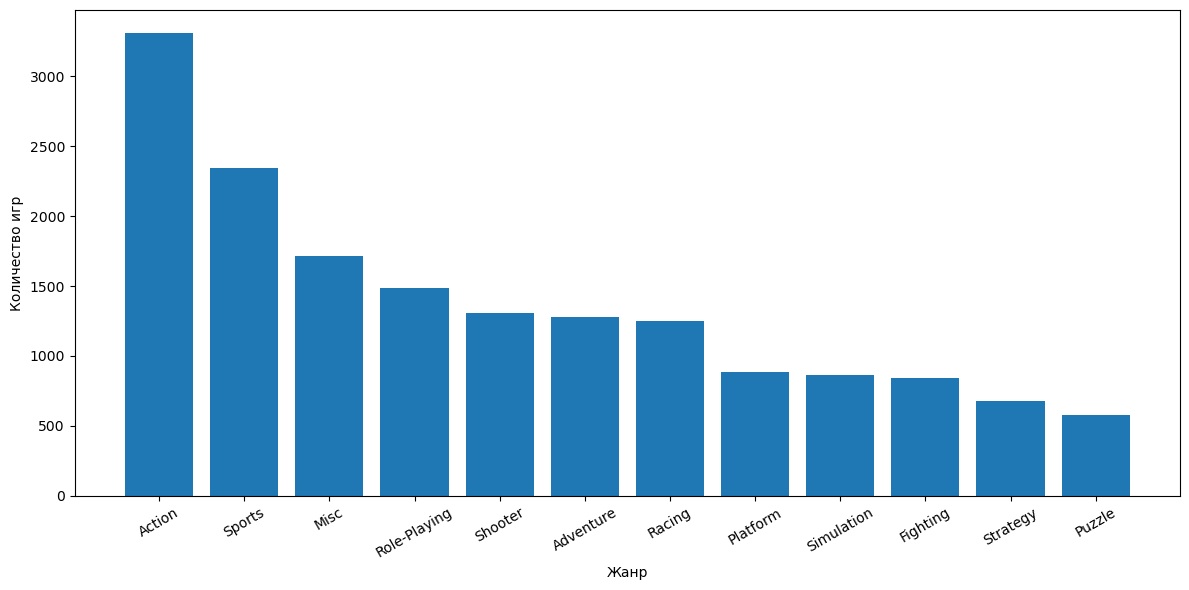

In [100]:
genre_counts = vgs['Genre'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(genre_counts.index, genre_counts.values)

plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#### 12. На какой платформе самая высокая цена продажи в мире?

In [135]:
platform_sales = vgs.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

In [136]:
platform_sales.plot(kind='bar')

<Axes: xlabel='Platform'>

#### 13. Выведите топ 20 Publisher

In [101]:
top_publishers = vgs['Publisher'].value_counts().nlargest(20)

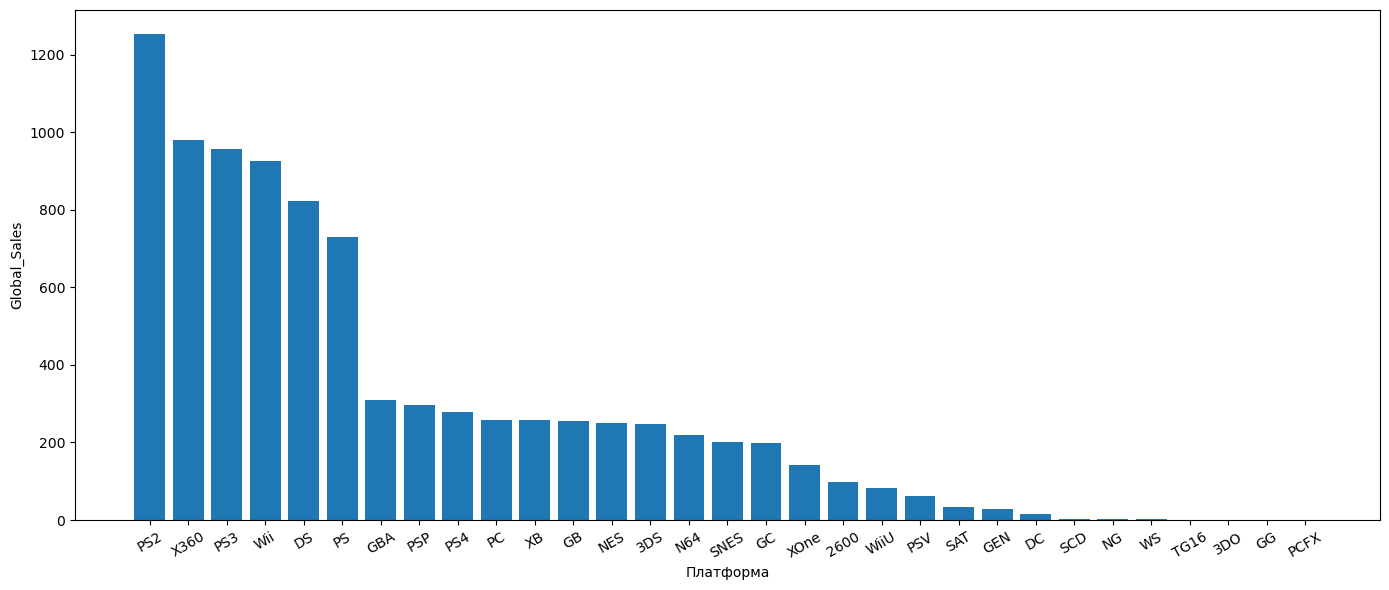

In [102]:
platform_sales = vgs.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(platform_sales.index, platform_sales.values)

plt.xlabel('Платформа')
plt.ylabel('Global_Sales')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#### 14. Общий доход по регионам

In [103]:
vgs

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [104]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_by_region = pd.DataFrame({'region': regions,'sale': [vgs[col].sum() for col in regions]})
sales_by_region

,region,sale
0,NA_Sales,4384.41
1,EU_Sales,2429.45
2,JP_Sales,1290.09
3,Other_Sales,797.08


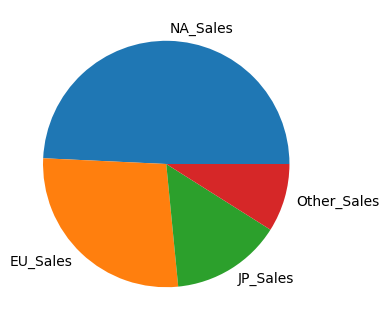

In [105]:
plt.figure(figsize=(8, 4))
plt.pie(sales_by_region['sale'], labels=sales_by_region['region'])
plt.show()

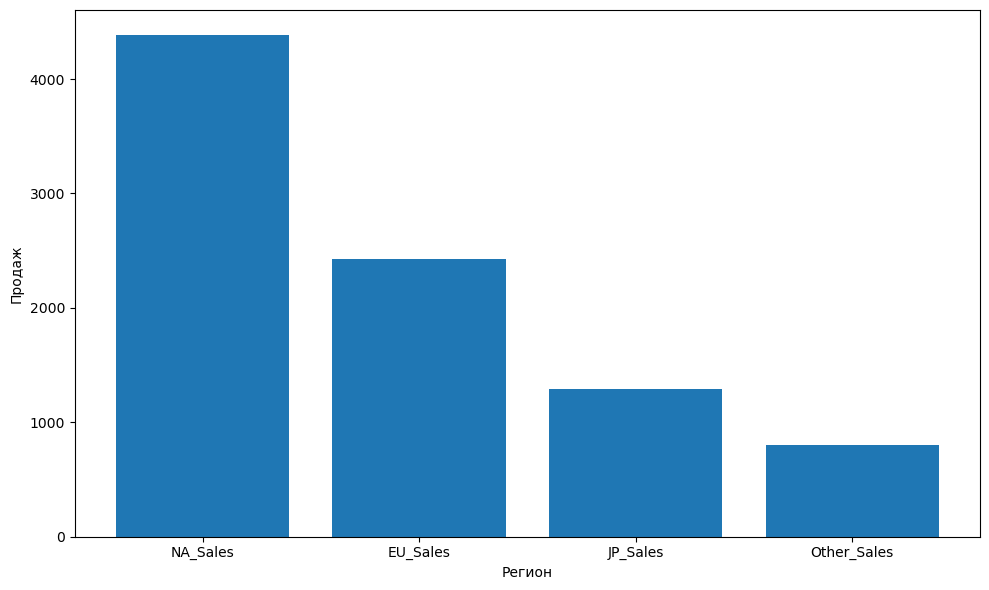

In [106]:
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_region['region'], sales_by_region['sale'])

plt.xlabel('Регион')
plt.ylabel('Продаж')

plt.tight_layout()
plt.show()

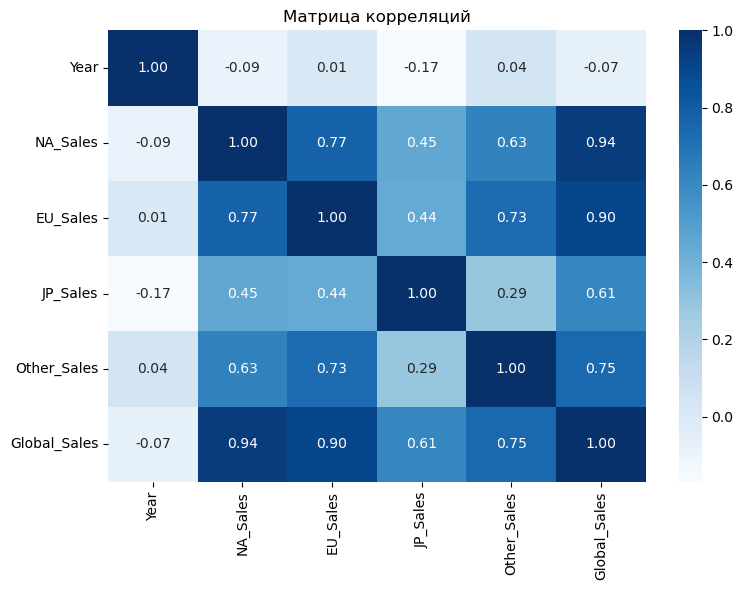

In [108]:
numeric_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr_matrix = vgs[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

### 15.Pair plot

In [109]:
result = vgs[['Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
result

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


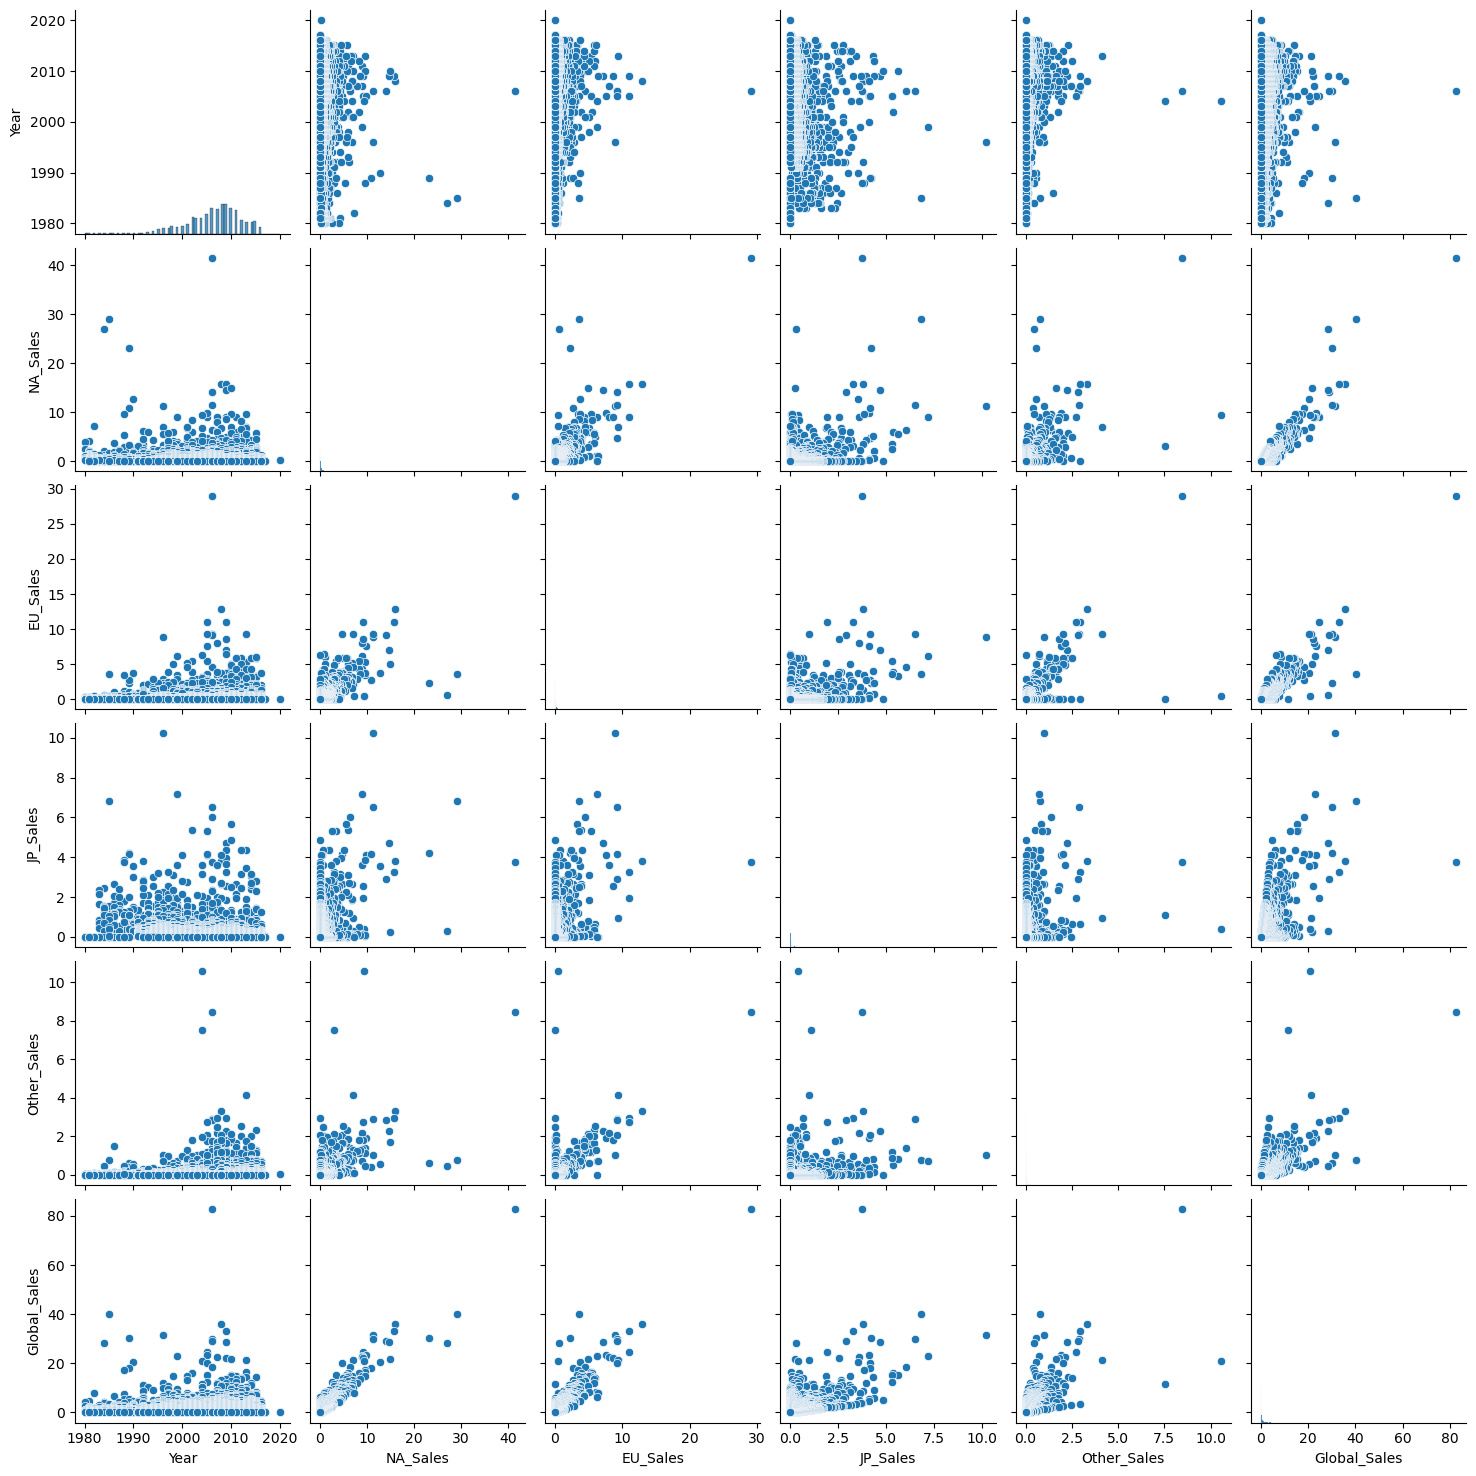

In [110]:
sns.pairplot(vgs[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].dropna())
plt.show()

#### 16. Выведите 3 самых распространенных жанра видеоигр в мире

In [111]:
vgs['Genre'].value_counts().head(3)

Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

### 17. В названиях скольких видеоигр есть слово «super» ??

In [116]:
print(vgs['Name'].str.contains('super', case=False).sum())

383
